# numpy + matplotlib

*notebook by Maureen Ahiataku and Leif Denby*

In this notebook you will learn how to manipulate and visualise data using the `numpy` and `matplotlib` python packages. In order to be able to manipulate data using python, the data has to be read variables within the python workspace. This is similar to the import of text file into MsExcel. The numpy package contains useful functions for doing this.

**Objectives**: 
    
1. Generate an array with numpy, find the attributes and save to a file ascii and csv

2. Reading an ascii and csv files with numpy

3. Selecting/subsetting data with numpy

4. Performing basic arithmetic in numpy

5. Plotting ascii data with matplotlib and numpy, to create timeseries, bar charts, histograms, pie charts, scatter plots and annotated heatmaps.

<b>Numpy</b> is "Numerical Python". It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, basic linear algebra, basic statistical operations, random simulation and many more.

Numpy is well-documented on https://numpy.org/doc/stable/ and in the MIT numpy-book: https://web.mit.edu/dvp/Public/numpybook.pdf

In [1]:
import numpy as np
from pathlib import Path

data_path = Path("../data")

## 1. Generate an array

Generate an array with numpy, find the attributes and save to a file ascii and csv (using savetxt)

In [2]:
ar = np.array([2, 3, 6])
print(ar)

[2 3 6]


In [3]:
# Generating a random array using numpy and store to 'a'
a = np.arange(20).reshape(5, 4)

# Attributes of the array 
a.shape # shape(n-rows, m-columms) is the size of array
a.ndim  # number of axes(dimensions) of the array
a.size  # total number of elements of the array which is equal to the product of the "shape" elements

print(a)
print(a.ndim)
print(a.size)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
2
20


In [4]:
# Save new array to ascii format, we can optionally set
# how the numbers will be formatted (e.g. number of decimal points)
np.savetxt("a_values.txt", a)
np.savetxt("a_values_format.txt", a, fmt="%2.3f")

CSV is an text-based format where the values are comma-separated and is common data storage file type. It is a text file designed to store data in tabular form where each row of data has its own line, and a comma separates each value.

In [5]:
# Save new array to csv and format
np.savetxt("a_values.csv", a, delimiter=",")
np.savetxt("a_values_format.csv", a, fmt="%2.3f", delimiter=",")

# 2. Reading ascii and CSV-formatted files

We will now see how to read in text-based files using the `numpy` functions `genfromtxt` and `loadtxt`. `genfromtxt` is slower than `loadtxt`, but it has the ability of coping with missing data. It processes the file in two ways. First it converts the lines of the file into strings and finally converts the strings into the requested data type. This makes `loadtxt` faster since it has one way process.

The northern hemisphere monthly mean temperature is from 1850 to 2015 as is taken from the University of Reading course MTMA33: Introduction to Computing (www.met.reading.ac.uk/~emily/python_teaching).

In [6]:
atxt = np.loadtxt("a_values.txt", delimiter=" ")  # ,dtype='str,int')
print(atxt)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]]


In [7]:
# Reading csv file using loadtxt
acsv = np.loadtxt("a_values_format.csv", delimiter=",", usecols=(0, 2, 3))
print(acsv)

[[ 0.  2.  3.]
 [ 4.  6.  7.]
 [ 8. 10. 11.]
 [12. 14. 15.]
 [16. 18. 19.]]


In [8]:
# Reading file with genfromtxt
temp = np.genfromtxt(data_path / "nh_temperature.txt")
temp.shape, temp  # This shows a temperature data array of 166 rows and 13 columns

((166, 13),
 array([[ 1.850e+03, -8.400e-01, -5.000e-02, ..., -5.500e-01, -2.300e-01,
         -2.300e-01],
        [ 1.851e+03, -1.900e-01, -4.700e-01, ...,  1.000e-01,  1.000e-02,
          3.000e-02],
        [ 1.852e+03,  9.000e-02, -3.300e-01, ..., -1.300e-01, -2.000e-01,
          3.200e-01],
        ...,
        [ 2.013e+03,  5.500e-01,  6.600e-01, ...,  6.600e-01,  9.100e-01,
          6.600e-01],
        [ 2.014e+03,  7.000e-01,  3.900e-01, ...,  8.000e-01,  6.000e-01,
          9.000e-01],
        [ 2.015e+03,  9.900e-01,  9.600e-01, ...,  1.050e+00,  1.080e+00,
          1.410e+00]]))

# 3. Selecting/subsetting data with numpy

use comma to separate indexing into the different dimensions of the data array

use colon to construct slices to select a range of values along a specific dimension


In [9]:
# This prints the value of the first row and first column in the dataset
print(temp[0, 0])

1850.0


In [10]:
# Selecting a range. Print the data on the first row, from column 7 to 10
print(temp[0, 7:10])

[-0.09 -0.06 -0.35]


In [11]:
# Select all the data from column 1 to 4 from the first 10 rows
print(temp[:10, 0:4])

[[ 1.850e+03 -8.400e-01 -5.000e-02 -7.000e-01]
 [ 1.851e+03 -1.900e-01 -4.700e-01 -7.000e-01]
 [ 1.852e+03  9.000e-02 -3.300e-01 -4.700e-01]
 [ 1.853e+03  1.800e-01 -5.000e-02 -3.000e-01]
 [ 1.854e+03 -3.200e-01 -1.700e-01 -5.000e-02]
 [ 1.855e+03  1.000e-02 -5.300e-01 -1.700e-01]
 [ 1.856e+03 -6.000e-02 -3.600e-01 -6.900e-01]
 [ 1.857e+03 -5.700e-01 -1.900e-01 -3.900e-01]
 [ 1.858e+03 -2.900e-01 -8.100e-01 -6.300e-01]
 [ 1.859e+03 -2.200e-01 -1.000e-02 -1.900e-01]]


In [12]:
# Select all the data in the first column.
print(temp[:, 0])

[1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859. 1860. 1861.
 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871. 1872. 1873.
 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883. 1884. 1885.
 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895. 1896. 1897.
 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909.
 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921.
 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933.
 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 20

# 4.Performing basic arithmetic in numpy

You can use the `np.min` and `np.max` functions to find the minimum and maximum values in an array

In [13]:
temp_min = np.min(temp[1:, 1:])  # find the minimum value without the years
temp_max = np.max(temp[1:, 1:])  # find the maximum value without the years

temp_min, temp_max  # view results
print(("Min. temperature = ", temp_min, "Max. temperature = ", temp_max))

('Min. temperature = ', -1.51, 'Max. temperature = ', 1.41)


In [14]:
# find the standard deviation for july
# Numpy dimensions are known as axes.
# row    = axis-0 That is along the rows
# column = axis-1 That is along the columns

july_std = np.std(temp[:, 7], axis=0)  # Calculate along the entire rows for column 7 OR
july_std1 = np.std(temp[:, 7])  # Gives same results.

july_std, july_std1

(0.2951041208694972, 0.2951041208694972)

In [15]:
# Calculate the monthly and annual mean temperature anomalies for 2010 - 2015
mon_mean = np.mean(temp[160:167, 1:13], axis=0)
ann_mean = np.mean(temp[160:167, 1:13], axis=1)

mon_mean, ann_mean

(array([0.61      , 0.56166667, 0.67166667, 0.75166667, 0.73      ,
        0.77333333, 0.76166667, 0.795     , 0.75333333, 0.77333333,
        0.78666667, 0.72      ]),
 array([0.73833333, 0.57083333, 0.62916667, 0.64666667, 0.7575    ,
        1.00166667]))

# Plotting with `matplotlib`

The `matplotlib` package contains the `matplotlib.pyplot` module for creating plots - this module is generally imported as `plt` (as you will see below) to avoid having to type out `pyplot` every time.

There are two ways if plotting in matplotlib. The first is to call functions that are defined as part of `plt`, for example `plt.plot` to create a figure, `plt.plot` to plot a line, `plt.title` to set the title etc. This approach is however prone to creating issues when you create figures with multiple subplots within them as `plt.set_title` will set the title on the subplot you've most recently created.

The second option is create an "axes" and then call the relevant plot, title, x-limit function directly on the axes you want to use.


`plt.plot` is a module which creates the axes, add additional lines on the same axes, and plt.xlabel, plt.ylabel, plt.title and plt.legend set the axes labels and title and
add a legend. Figure supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff.


https://matplotlib.org/2.0.2/Matplotlib.pdf


In [16]:
# usually you should put your imports at the top of a notebook, but
# we're putting it here so you can see that `matplotplot.pyplot` has
# been imported as `plt`
import matplotlib.pyplot as plt

Text(0.5, 0, 'x-label [1]')

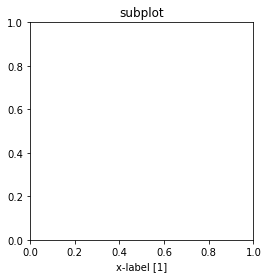

In [17]:
# to figure with a single subplot of a specific size
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title("subplot")
ax.set_xlabel("x-label [1]")

Text(0.5, 1.0, 'subplot 2')

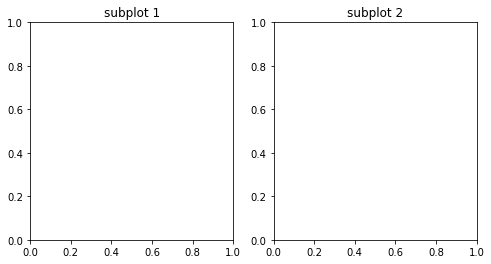

In [18]:
# figure with two subplots of a specific size
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].set_title("subplot 1")
axes[1].set_title("subplot 2")

Text(0.5, 1.0, 'subplot 2')

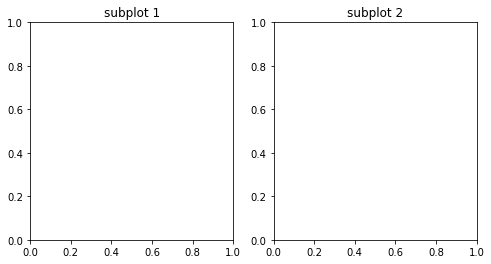

In [19]:
# figure with two subplots, adding subplots individually
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("subplot 1")
ax2.set_title("subplot 2")

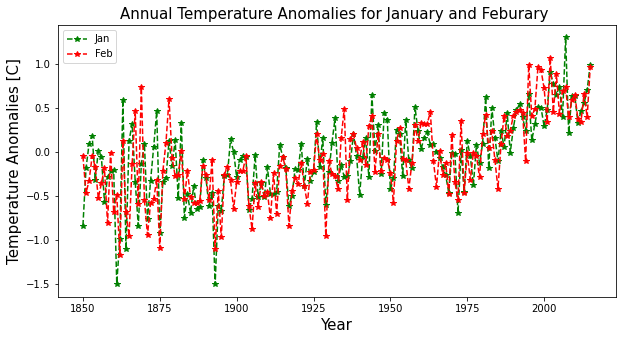

In [20]:
# Timeseries plot
# Plot the temperature timeseries for January and Feburary

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(temp[:, 0], temp[:, 1], color="green", lw=1.5, ls="--", marker="*", label="Jan")
ax.plot(temp[:, 0], temp[:, 2], color="red", lw=1.5, ls="--", marker="*", label="Feb")

# Label the axis
ax.set_ylabel("Temperature Anomalies [C]", fontsize=15)
ax.set_xlabel("Year", fontsize=15)
ax.set_title(
    "Annual Temperature Anomalies for January and Feburary ", fontsize=15
)  # add title
ax.legend()  # add legend
fig.savefig("Jan_Feb_Temp_Ano.pdf")  # save figure to pdf

Text(0, 0.5, 'Temperature anomalies [C]')

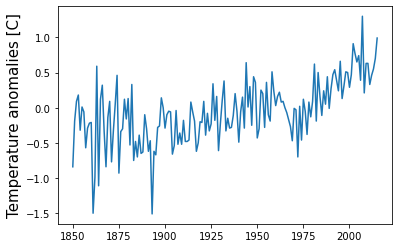

In [21]:
import numpy as np
import matplotlib.pyplot as plt

yr = np.arange(1850,2016)

fig, ax = plt.subplots()

ax.plot(yr,temp[:,1])
ax.set_ylabel('Temperature anomalies [C]', fontsize=15)


/home/earlcd/anaconda2/envs/lagtraj/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


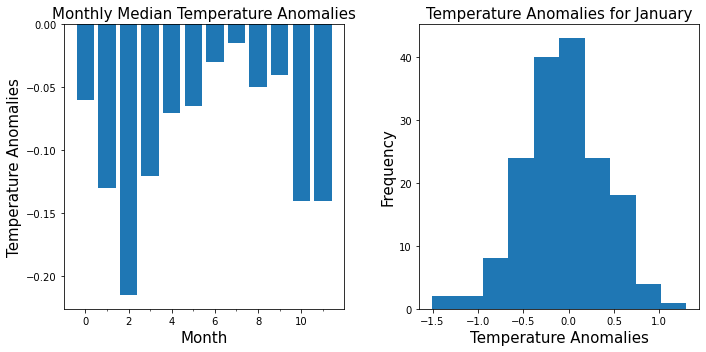

In [22]:
# Bar and histogram Chart
import numpy as np
import matplotlib.pyplot as plt

temp_median = np.median(temp[:, 1:13], axis=0)
months = (
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
)
x = np.arange(len(temp_median))

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Generate bars
ax1 = axes[0]
ax1.bar(months, temp_median)

ax1.set_xlabel("Month", fontsize=15)
ax1.set_ylabel("Temperature Anomalies", fontsize=15)
ax1.set_title("Monthly Median Temperature Anomalies", fontsize=15)

# Generate a histogram plot
ax2 = axes[1]
ax2.hist(temp[:, 1], bins=10)
ax2.set_xlabel("Temperature Anomalies", fontsize=15)
ax2.set_ylabel("Frequency", fontsize=15)
ax2.set_title("Temperature Anomalies for January", fontsize=15)

fig.tight_layout()  # Helps fit the plots well without overlapping each other

fig.savefig("bar_temp.jpeg")

# Pie Chart

Next we will look at annual rainfall distribution from the Tamale weather station in northern Ghana. First we must read in the data we will use. The Tamale monthly rainfall is from CRU (Climate Research Unit data, https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.04/ge/) data from 1901 to 2015. The first line contains the "header" of the file, describing first what the variable is "PRE" (precipitation) and months of the year. The file contains the total monthly precipitation by year, with a row for each year.

In [23]:
filepath_tamale = data_path / "Tamale_CRU_rainfall.csv"

In [24]:
# lets have a look at the first 5 lines
for line in open(filepath_tamale).readlines()[:5]:
    print(line, end="")

print("")
# and the last 5
for line in open(filepath_tamale).readlines()[-5:]:
    print(line, end="")

PRE,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,
1901,1.3,12.1,27.4,101,134.7,159,109.1,217.2,235.7,160.3,17.7,0.7,
1902,1.8,6.2,82.2,124.9,189.3,119.6,170.8,205,158.9,99.9,12.1,10.3,
1903,2,2.7,26.5,110,156,104.5,112.4,202.9,187.2,85.6,23.9,5.8,
1904,5.1,5.2,47.9,79.6,146,121.2,122.8,119.2,166.4,99.9,14.6,8.8,

2012,2.8,13.9,10.2,98.9,140.3,137.6,190.1,173.2,217.1,102.4,12,6.7,
2013,0.7,7.6,68.3,139.4,111.8,93,151.2,148.5,178.8,135.1,19.5,2.5,
2014,11,7.4,64.2,122.5,130.9,138.7,143.6,177.5,242.9,89.7,23.3,1.7,
2015,0.3,46.2,32.7,37.5,101.2,100.9,152.6,245.5,182.7,119.1,7.3,0.8,
,,,,,,,,,,,,,


In [25]:
# we will skip the first line containing the header because that doesn't contain the numbers we want
# and we will skip the last line of the file (the footer) because that just contains many commas
rain = np.genfromtxt(
    data_path / "Tamale_CRU_rainfall.csv", delimiter=",", skip_header=1, skip_footer=1
)

In [26]:
# Let's check the mean to ensure we've read it in reasonably
rain_mean = np.mean(rain[1:, 1:13], axis=0)
print(rain_mean)
rain.shape

[  2.89298246  10.7122807   49.22719298  92.04035088 131.35350877
 133.63684211 159.51491228 188.52017544 223.73157895 113.52192982
  17.57631579   6.04649123]


(115, 14)

Text(0.5, 1.0, 'Monthly Climatological Rainfall (mm) over Tamale')

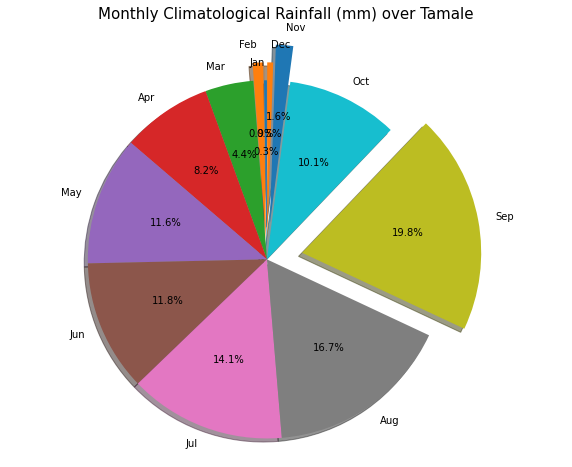

In [27]:
# now let's create a pie-chart of the rain-fall

Months = (
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
)
explode = (0.0, 0.1, 0, 0, 0, 0, 0, 0, 0.2, 0, 0.2, 0.1)  # explode aid slicing

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(
    rain_mean,
    explode=explode,
    labels=Months,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title("Monthly Climatological Rainfall (mm) over Tamale", fontsize=15)

## Scatter plot

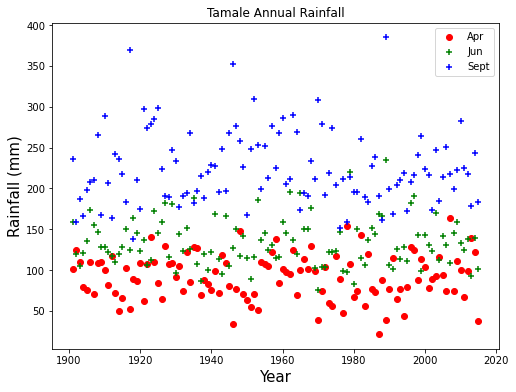

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(rain[:, 0], rain[:, 4], marker="o", color="red", label="Apr")
ax.scatter(rain[:, 0], rain[:, 6], marker="+", color="green", label="Jun")
ax.scatter(rain[:, 0], rain[:, 9], marker="+", color="blue", label="Sept")
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Rainfall (mm)", fontsize=15)
ax.legend()
ax.set_title("Tamale Annual Rainfall")

fig.savefig("scatter_rain.png")

(-0.5, 6.5)

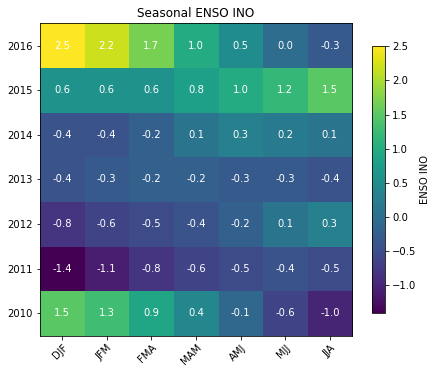

In [29]:
# Creating annotated heatmaps for NOAA ENSO data
# link for data
# https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

years = np.arange(2010, 2017)
seasons = ["DJF", "JFM", "FMA", "MAM", "AMJ", "MJJ", "JJA"]  # farmer

ion = np.array(
    [
        [1.5, 1.3, 0.9, 0.4, -0.1, -0.6, -1],
        [-1.4, -1.1, -0.8, -0.6, -0.5, -0.4, -0.5],
        [-0.8, -0.6, -0.5, -0.4, -0.2, 0.1, 0.3],
        [-0.4, -0.3, -0.2, -0.2, -0.3, -0.3, -0.4],
        [-0.4, -0.4, -0.2, 0.1, 0.3, 0.2, 0.1],
        [0.6, 0.6, 0.6, 0.8, 1.0, 1.2, 1.5],
        [2.5, 2.2, 1.7, 1.0, 0.5, 0.0, -0.3],
    ]
)


fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(ion)

# show all ticks
ax.set_xticks(np.arange(len(seasons)))
ax.set_yticks(np.arange(len(years)))

# label ticks with the respective list entries
ax.set_xticklabels(seasons)
ax.set_yticklabels(years)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(seasons)):
        text = ax.text(j, i, ion[i, j], ha="center", va="center", color="w")

ax.set_title("Seasonal ENSO INO")
fig.colorbar(
    im, ax=ax, shrink=0.7, label="ENSO INO"
)  # shrink function set the legend height
ax.set_ylim(-0.5, len(years) - 0.5)

<b>Exercise</b>

Q1

1a.On same figure, plot the January, March, June, September and December temperature datasets.

1b.Compute and plot the median of annual temperatures anomalies.

1c.Compute and plot the median of monthly temperatures anomalies


Q2

2a. Plot March, April and May temperatures anomalies on the same figure

2b. Compute and plot the mean of the annual tempratures

2c. Generate subplot using figures from 2a and 2b and 

2d. Save the final figure as png


Q3

3a. Read the file "Tamale_CRU_rainfall.csv" using genfromtxt

3b. Create a subplot which contain a bar chart showing the August annual rainfall and a timeseries by compute the annaul rainfall total

3c. Create a bar chart for June rainfall and timeseries of the annual mean rainfall on  the same figure. Save figures to png

Note:label all your axes, add titles and legends 